<a href="https://colab.research.google.com/github/Mansi67/Global_Terrorism_Dataset_EDA/blob/main/Global_Terrorism_Dataset_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -



##### **Project Type**    - EDA/Regression/Classification/Unsupervised
##### **Contribution**    - Individual/Team
##### **Team Member 1 -**
##### **Team Member 2 -**
##### **Team Member 3 -**
##### **Team Member 4 -**

# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**Write Problem Statement Here.**

#### **Define Your Business Objective?**

Answer Here.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 20 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Dataset Loading

In [2]:
# Load Dataset
df=pd.read_csv("/content/Global_Terrorism_Data.csv", encoding = "ISO-8859-1")

<ipython-input-2-264307a984f3>:2: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv("/content/Global_Terrorism_Data.csv", encoding = "ISO-8859-1")


### Dataset First View

In [3]:
# Dataset First Look
df.head(2)

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN


In [4]:
df.tail(2)

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
181689,201712310031,2017,12,31,NaN,0,NaN,92,India,6,...,NaN,"""Trader escapes grenade attack in Imphal,"" Bus...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN
181690,201712310032,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Security tightened in Cotabato following IED ...","""Security tightened in Cotabato City,"" Manila ...",NaN,START Primary Collection,-9,-9,0,-9,NaN


### Dataset Rows & Columns count

In [5]:
# Dataset Rows & Columns count
df.shape

(181691, 135)

Dataset has 1,81,691 rows and 135 columns

In [6]:
df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [7]:
df.columns = df.columns.to_series().apply(lambda x: x.strip())

In [8]:
#Renaming the columns

df.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','provstate':'State','city':'City',
                       'region_txt':'Region','attacktype1_txt':'Attack_Type','nkill':'Killed',
                       'nwound':'Wounded','gname':'Group','targtype1_txt':'Target_Type',
                   'weaptype1_txt':'Weapon_Type','motive':'Motive', 'property':'Property_Damages',
                   'propextent_txt':'PropDamageExtent','weapsubtype1_txt':'Weapon_Subtype'},inplace=True)

In [10]:
#As there are too many columns in dataset, we are taking only important columns from the dataset for data preprocessing

df = df[['eventid','Year','Month','Day','Country','State','City','Region','latitude','longitude','specificity','Attack_Type','success','Killed',
               'Wounded','extended','Target_Type','suicide','Weapon_Type','Weapon_Subtype','Group','nperps','Motive','Property_Damages',
         'PropDamageExtent']]

### Dataset Information

In [11]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 25 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   eventid           181691 non-null  int64  
 1   Year              181691 non-null  int64  
 2   Month             181691 non-null  int64  
 3   Day               181691 non-null  int64  
 4   Country           181691 non-null  object 
 5   State             181270 non-null  object 
 6   City              181257 non-null  object 
 7   Region            181691 non-null  object 
 8   latitude          177135 non-null  float64
 9   longitude         177134 non-null  float64
 10  specificity       181685 non-null  float64
 11  Attack_Type       181691 non-null  object 
 12  success           181691 non-null  int64  
 13  Killed            171378 non-null  float64
 14  Wounded           165380 non-null  float64
 15  extended          181691 non-null  int64  
 16  Target_Type       18

There are 6 float, 8 int and 11 object columns

#### Duplicate Values

In [12]:
# Dataset Duplicate Value Count
df.duplicated().sum()

0

There are zero duplicate rows in the dataset

#### Missing Values/Null Values

In [13]:
# Missing Values/Null Values Count
df.isnull().any()

eventid             False
Year                False
Month               False
Day                 False
Country             False
State                True
City                 True
Region              False
latitude             True
longitude            True
specificity          True
Attack_Type         False
success             False
Killed               True
Wounded              True
extended            False
Target_Type         False
suicide             False
Weapon_Type         False
Weapon_Subtype       True
Group               False
nperps               True
Motive               True
Property_Damages    False
PropDamageExtent     True
dtype: bool

In [ ]:
# No of columns with missing values

len([col for col in df.columns if df[col].isnull().any()])

11

In [14]:
#Print the number of null values in each column
df.isnull().sum()


eventid                  0
Year                     0
Month                    0
Day                      0
Country                  0
State                  421
City                   434
Region                   0
latitude              4556
longitude             4557
specificity              6
Attack_Type              0
success                  0
Killed               10313
Wounded              16311
extended                 0
Target_Type              0
suicide                  0
Weapon_Type              0
Weapon_Subtype       20768
Group                    0
nperps               71115
Motive              131130
Property_Damages         0
PropDamageExtent    117626
dtype: int64

In [15]:
#Percentage of missing values in each column
data=round((1 - df.count() / len(df))*100,2)
df_missing = pd.DataFrame({'Column':data.index, '%Missing':data.values},index=None)

df_missing

,Column,%Missing
0,eventid,0.00
1,Year,0.00
2,Month,0.00
3,Day,0.00
4,Country,0.00
5,State,0.23
6,City,0.24
7,Region,0.00
8,latitude,2.51
9,longitude,2.51


<Axes: >

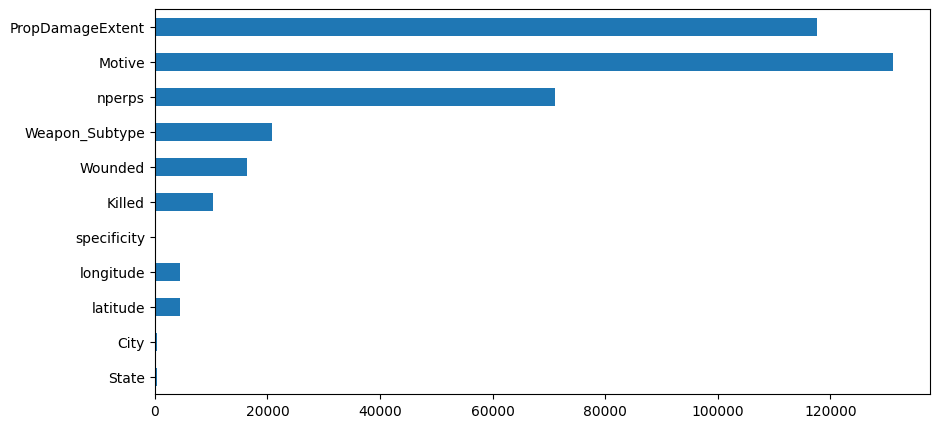

In [16]:
# Visualizing the missing values
plot_width, plot_height = (10,5)
plt.rcParams['figure.figsize'] = (plot_width,plot_height)
df.isna().sum()[df.isna().sum()>0].plot(kind='barh')


### What did you know about your dataset?

Answer Here

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns

In [ ]:
# Dataset Describe
df.describe()

,eventid,Year,Month,Day,latitude,longitude,specificity,success,Killed,Wounded,extended,suicide,nperps,Property_Damages
count,1.816910e+05,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181685.000000,181691.000000,171378.000000,165380.000000,181691.000000,181691.000000,110576.000000,181691.000000
mean,2.002705e+11,2002.638997,6.467277,15.505644,23.498343,-4.586957e+02,1.451452,0.889598,2.403272,3.167668,0.045346,0.036507,-65.361154,-0.544556
std,1.325957e+09,13.259430,3.388303,8.814045,18.569242,2.047790e+05,0.995430,0.313391,11.545741,35.949392,0.208063,0.187549,216.536633,3.122889
min,1.970000e+11,1970.000000,0.000000,0.000000,-53.154613,-8.618590e+07,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-99.000000,-9.000000
25%,1.991021e+11,1991.000000,4.000000,8.000000,11.510046,4.545640e+00,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,-99.000000,0.000000
50%,2.009022e+11,2009.000000,6.000000,15.000000,31.467463,4.324651e+01,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,-99.000000,1.000000
75%,2.014081e+11,2014.000000,9.000000,23.000000,34.685087,6.871033e+01,1.000000,1.000000,2.000000,2.000000,0.000000,0.000000,1.000000,1.000000
max,2.017123e+11,2017.000000,12.000000,31.000000,74.633553,1.793667e+02,5.000000,1.000000,1570.000000,8191.000000,1.000000,1.000000,25000.000000,1.000000


### Variables Description

Answer Here

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.

### What all manipulations have you done and insights you found?

Answer Here.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

# **No. of Attacks Per Year**

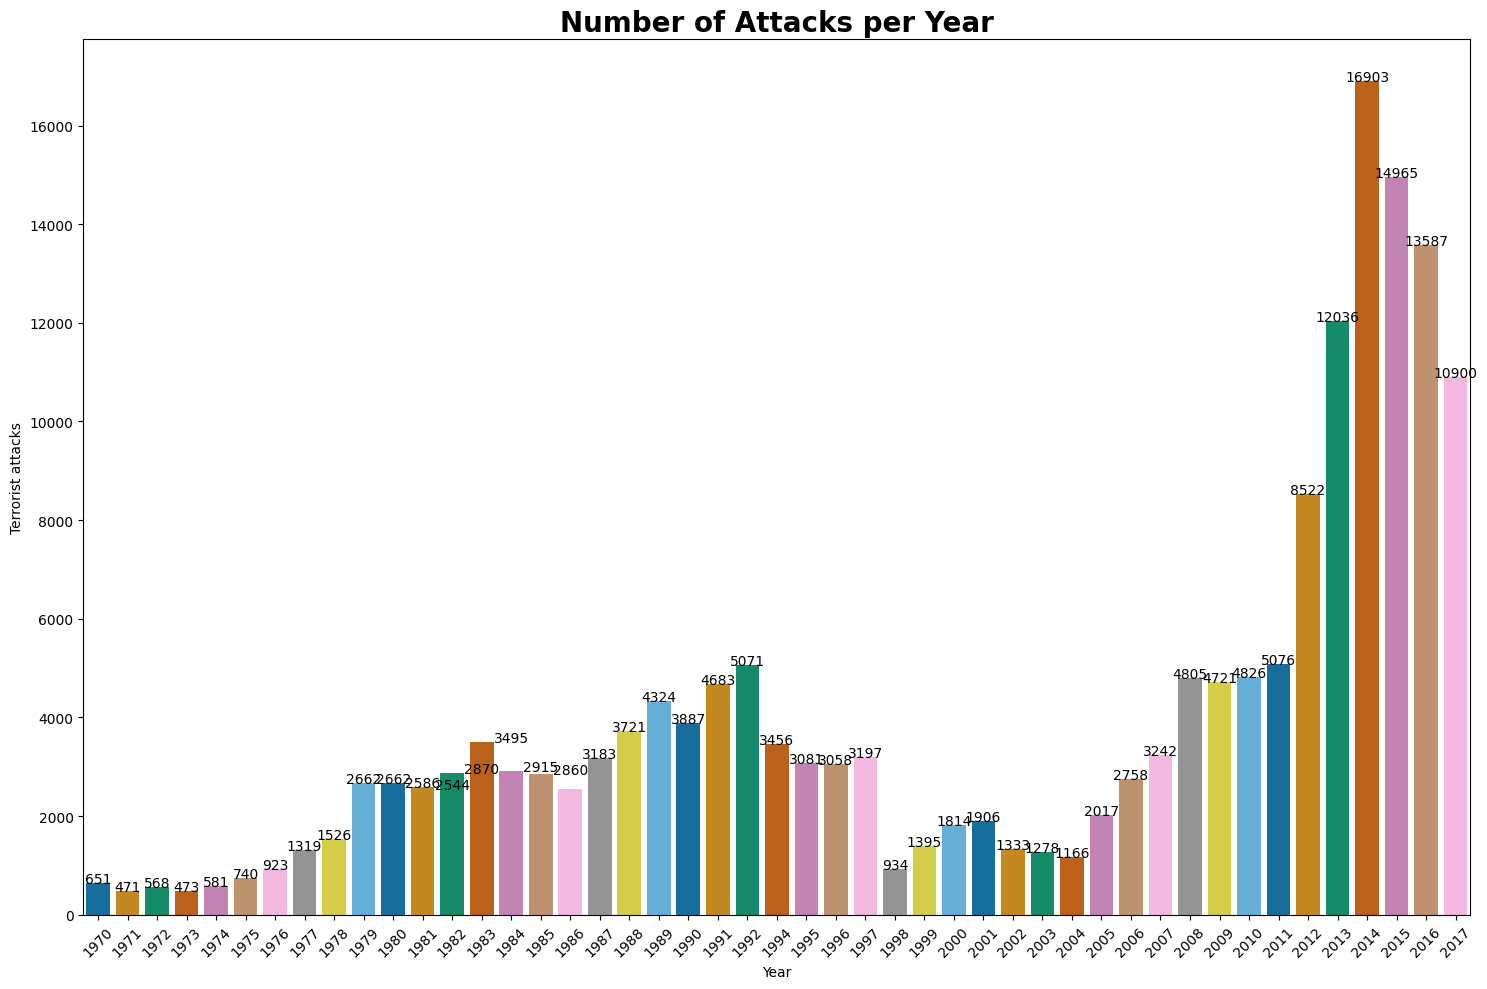

In [17]:
x_year = df['Year'].unique()
y_count_years = df['Year'].value_counts(dropna = False).sort_index()
plt.figure(figsize = (15,10))
ax=sns.barplot(x = x_year,
           y = y_count_years,palette='colorblind')
plt.xticks(rotation = 45)
plt.xlabel('Year')
plt.ylabel('Terrorist attacks')
plt.title('Number of Attacks per Year',fontsize = 15, fontweight="bold")
for i, v in enumerate(y_count_years):
   ax.text(i, v + 0.1, str(v), ha='center')
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

To establish a relationship between years and number of attacks.

##### 2. What is/are the insight(s) found from the chart?

The graphs shows linear increase in number of attacks as years progess. There were a large number of attacks across the world between 2012 and 2017.The number of attacks significantly dropped after 1997 and remained less for a couple of years up until 2007.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

In [ ]:

x.index,x.values

#### Chart - 2

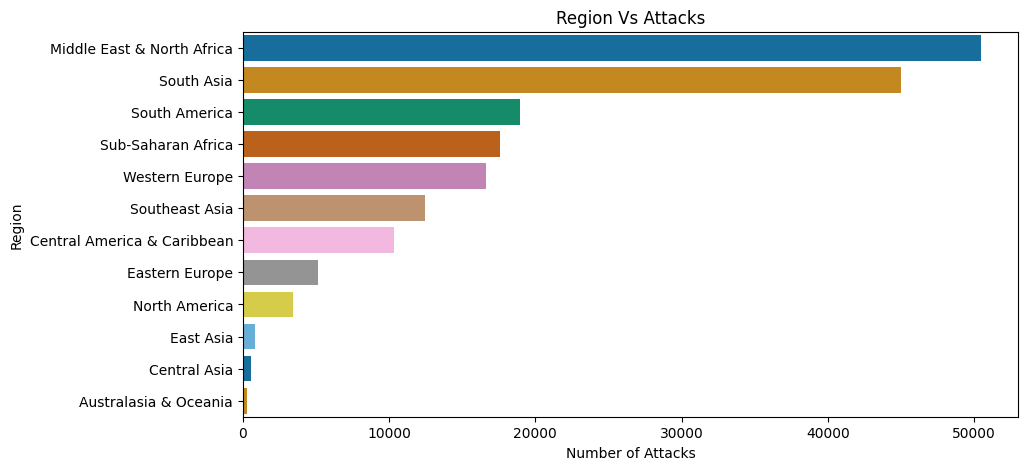

In [18]:
# Chart - 2 visualization code
x=df.groupby("Region")['eventid'].count().sort_values(ascending=False)
plt.figure(figsize = (10,5))
ax=sns.barplot(x = x.values,
           y = x.index,palette='colorblind', orient='h')
plt.ylabel('Region')
plt.xlabel('Number of Attacks')
plt.title('Region Vs Attacks',fontsize=15,fontweight='bold')

plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3

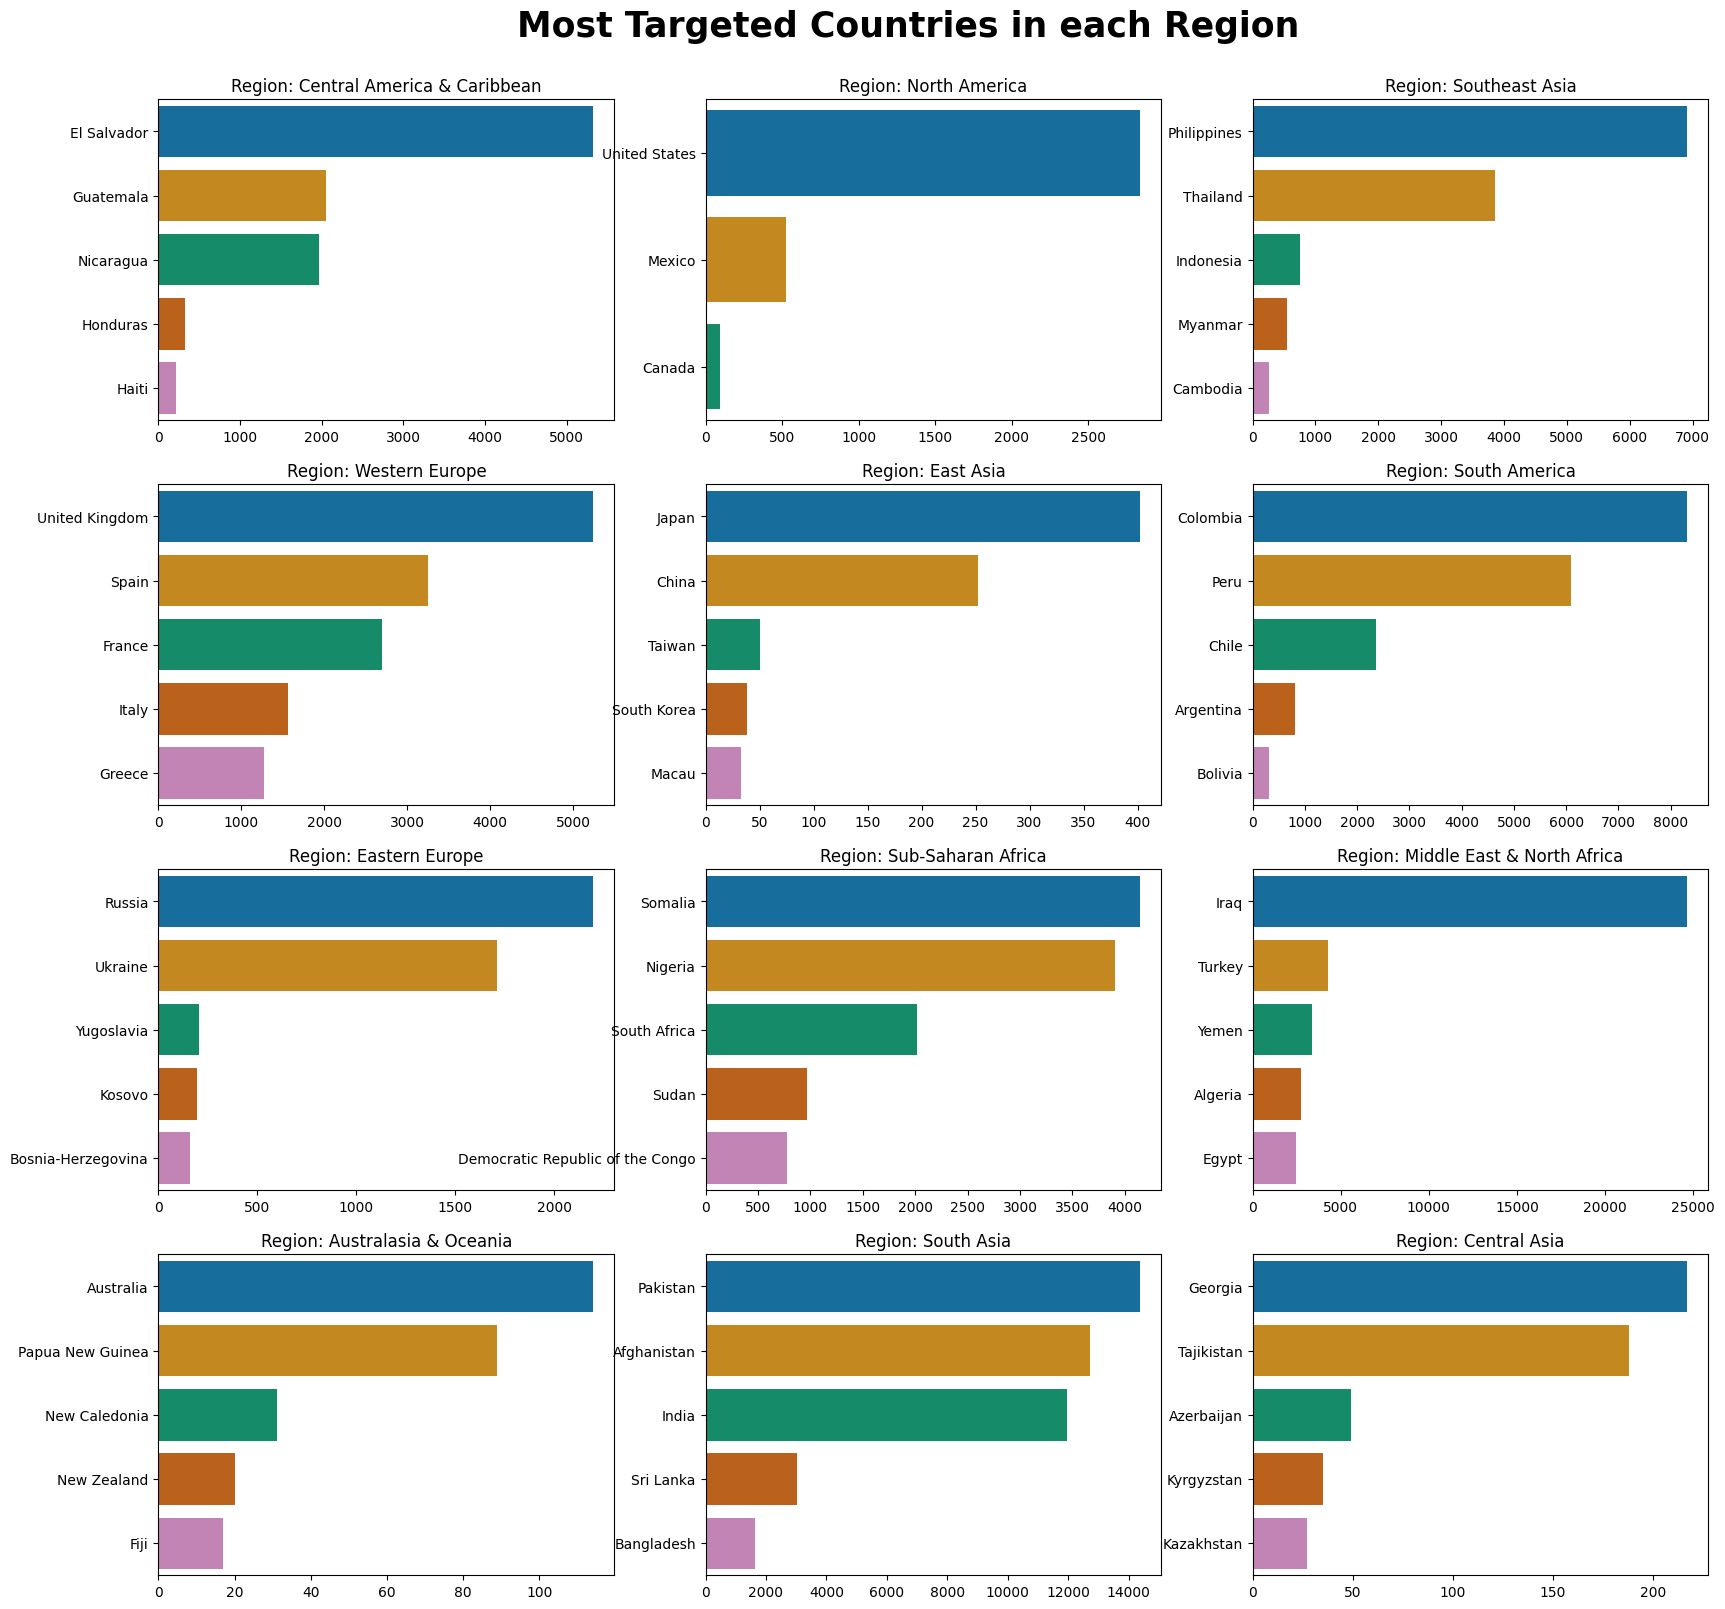

In [19]:
fig, axes = plt.subplots(4, 3, figsize=(20,18))
fig.subplots_adjust(top=0.93)
plt.suptitle("Most Targeted Countries in each Region",  fontsize = 15, fontweight="bold")
i=0
j=0
flag=0
for value in df['Region'].unique():
  x=df[df['Region']==value].groupby('Country')['eventid'].count().sort_values(ascending=False)[0:5]
  ax=sns.barplot(ax=axes[i,j],x = x.values, y = x.index,palette='colorblind', orient='h', ).set(title='Region: {}'.format(value),ylabel=None)
  j+=1
  flag+=1
  if j>2 and flag<12:
    i+=1
    j=0

plt.show()



##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

In [ ]:
df['Year']

#### Chart - 4

In [20]:
def decade(year):
    if year>=1970 and year<1980:
       result='1970-1980'
    elif year>=1980 and year<1990:
       result= '1980-1990'
    elif year>=1990 and year<2000:
      result= '1990-2000'
    elif year>=2000 and year<2010:
       result= '2000-2010'
    else:
       result= '2010-2017'
    return result

In [21]:
df['decade']=df['Year'].apply(decade)

In [22]:
df.sample(2)

,eventid,Year,Month,Day,Country,State,City,Region,latitude,longitude,...,Target_Type,suicide,Weapon_Type,Weapon_Subtype,Group,nperps,Motive,Property_Damages,PropDamageExtent,decade
47467,199107290003,1991,7,29,Chile,Santiago Metropolitan,Santiago,South America,-33.366238,-70.505302,...,Government (General),0,Explosives,Unknown Explosive Type,Manuel Rodriguez Patriotic Front (FPMR),NaN,NaN,1,NaN,1990-2000
159006,201602160045,2016,2,16,Turkey,Mardin,Nusaybin,Middle East & North Africa,37.080181,41.220196,...,Other,0,Firearms,Unknown Gun Type,Kurdistan Workers' Party (PKK),-99.0,NaN,0,NaN,2010-2017


In [23]:
df.groupby(["decade",'Region'])['eventid'].count()

decade     Region                     
1970-1980  Australasia & Oceania             16
           Central America & Caribbean      918
           East Asia                         78
           Eastern Europe                    26
           Middle East & North Africa      1090
           North America                   1596
           South America                   1009
           South Asia                        51
           Southeast Asia                   194
           Sub-Saharan Africa               242
           Western Europe                  4694
1980-1990  Australasia & Oceania             78
           Central America & Caribbean     7490
           East Asia                        110
           Eastern Europe                    43
           Middle East & North Africa      2883
           North America                    558
           South America                   9698
           South Asia                      2871
           Southeast Asia                  1086
 

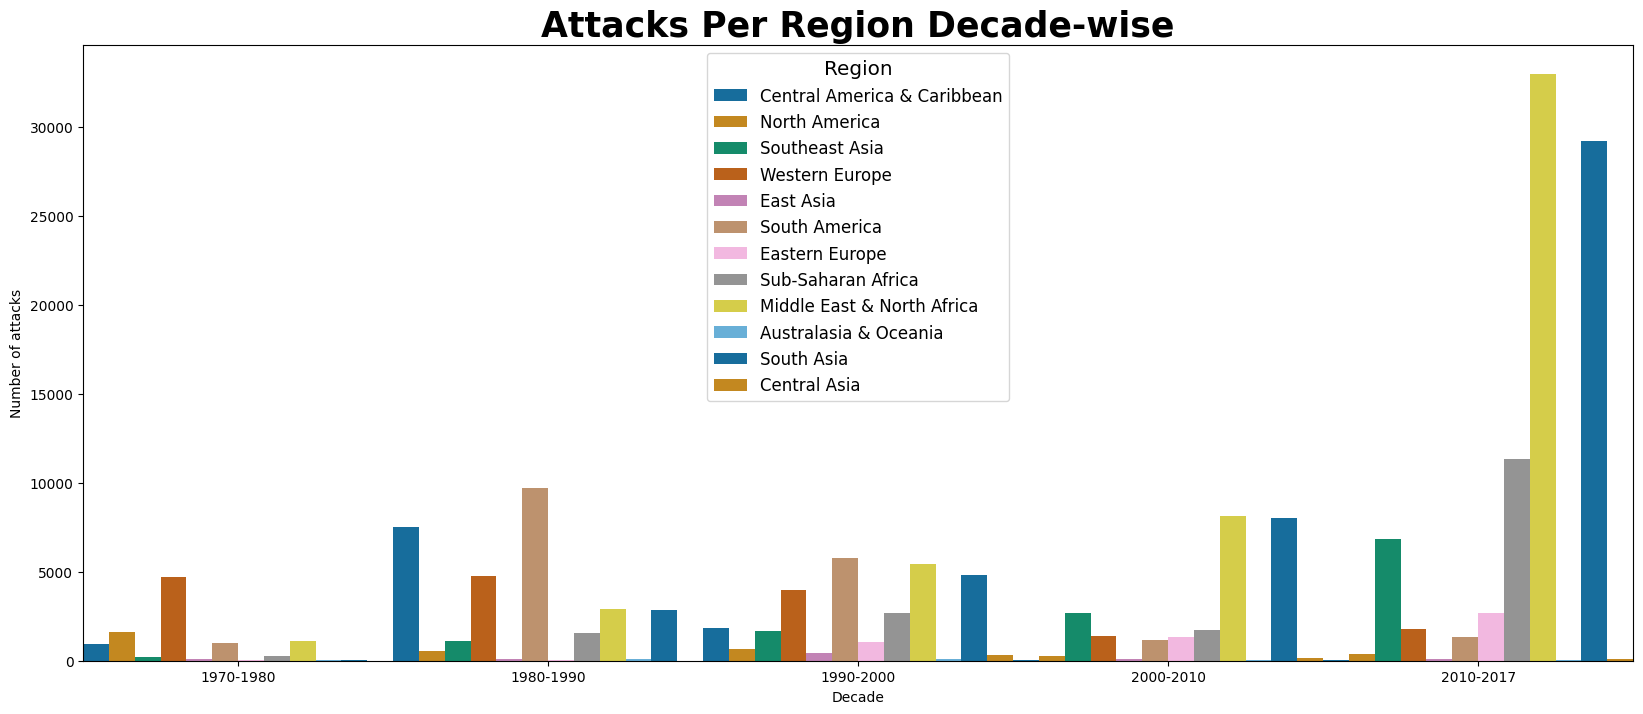

In [24]:
# Chart - 4 visualization code
plt.figure(figsize = (20,8))
ax=sns.countplot(x='decade', data=df, hue='Region', width = 1, palette='colorblind')
plt.ylabel('Number of attacks')
plt.xlabel('Decade')
plt.title('Attacks Per Region Decade-wise', fontsize = 15, fontweight="bold")
plt.legend(loc='upper center',
    fontsize='large',
    title='Region',
    title_fontsize='x-large')

plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

In [25]:
# Chart - 5 visualization code
df['suicide'].value_counts()

0    175058
1      6633
Name: suicide, dtype: int64

In [26]:
s=df[df['suicide']==1].groupby('Country')['eventid'].count().sort_values(ascending=False)[0:5]
others=df[df['suicide']==1].groupby('Country')['eventid'].count().sort_values(ascending=False)[5:].sum()

In [27]:
new_frame=pd.DataFrame({'Country':s.index,'SuicideAttacks':s.values}, index=None)
new_frame.loc[len(new_frame.index)] = ['Other', others]
new_frame

,Country,SuicideAttacks
0,Iraq,2602
1,Afghanistan,1228
2,Pakistan,511
3,Nigeria,389
4,Syria,344
5,Other,1559


Text(0.5, 1.0, 'Breakdown of Suicide Attacks')

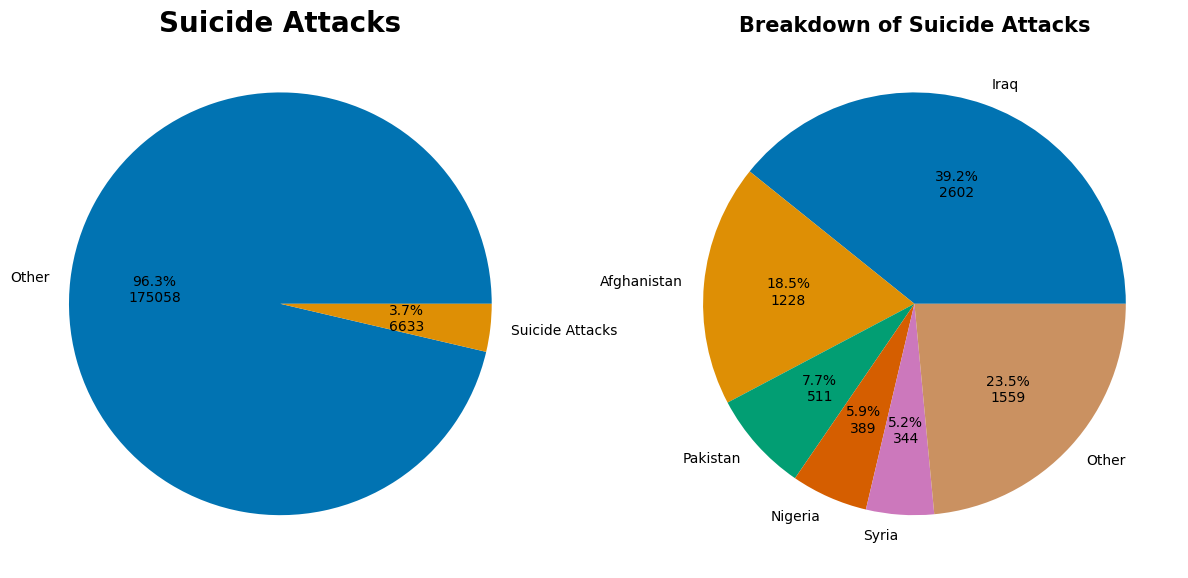

In [28]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(15,10)) #ax1,ax2 refer to your two pies

# 1,2 denotes 1 row, 2 columns - if you want to stack vertically, it would be 2,1
palette_color = sns.color_palette('colorblind')
labels = ['Other','Suicide Attacks']
values = df['suicide'].value_counts()
total=sum(values)
def fmt(x):
    return '{:.1f}%\n{:.0f}'.format(x, total*x/100)
ax1.pie(values,labels = labels,colors = palette_color,autopct=fmt) #plot first pie
ax1.set_title("Suicide Attacks", fontsize=20, fontweight='bold')


labels = new_frame['Country']
values = new_frame['SuicideAttacks']
total=sum(values)
def fmt(x):
    return '{:.1f}%\n{:.0f}'.format(x, total*x/100)
ax2.pie(values,labels = labels,colors = palette_color,autopct = fmt) #plot second pie
ax2.set_title("Breakdown of Suicide Attacks", fontsize=15, fontweight='bold')


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

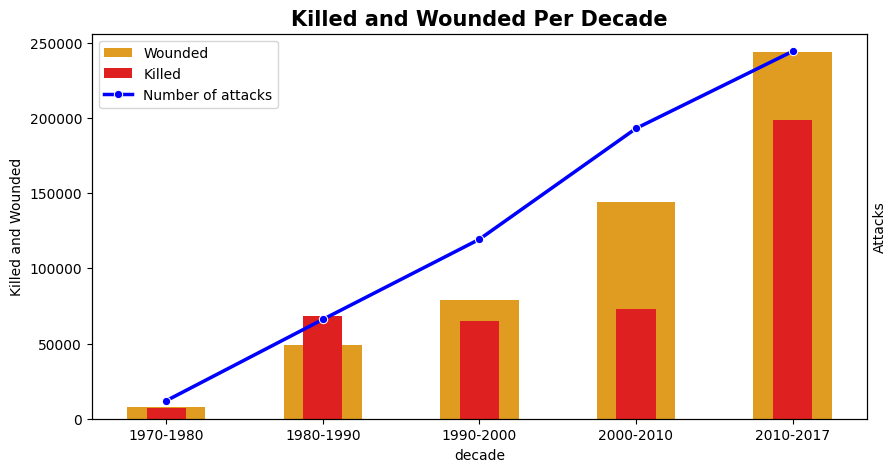

In [29]:
# Chart - 6 visualization code
new_frame=df.groupby('decade')[['Killed','Wounded']].sum().reset_index()
fig, ax1 = plt.subplots(figsize=(10, 5))
width=0.5
bar_plot1 = sns.barplot(x='decade', y='Wounded',width=width, data=new_frame, label="Wounded", color="orange", ax=ax1)
bar_plot2= sns.barplot(x='decade', y='Killed',width=0.5*width, data=new_frame,label="Killed", color="red",ax=ax1)

# Secondary y-axis for the line plot
ax2 = ax1.twinx()
sns.lineplot(x='decade', y='eventid', data=df, marker='o', linewidth=2.5, color='blue', ax=ax2, label='Number of attacks')
ax2.set_yticks([])
# Set labels and title
ax1.set_ylabel('Killed and Wounded')
ax2.set_ylabel('Attacks')
plt.xlabel('Decade')
plt.xticks(rotation = 0)
plt.title('Killed and Wounded Per Decade', fontsize = 15, fontweight="bold")
plt.legend(loc='upper center')

# Display legend
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 2000x800 with 0 Axes>

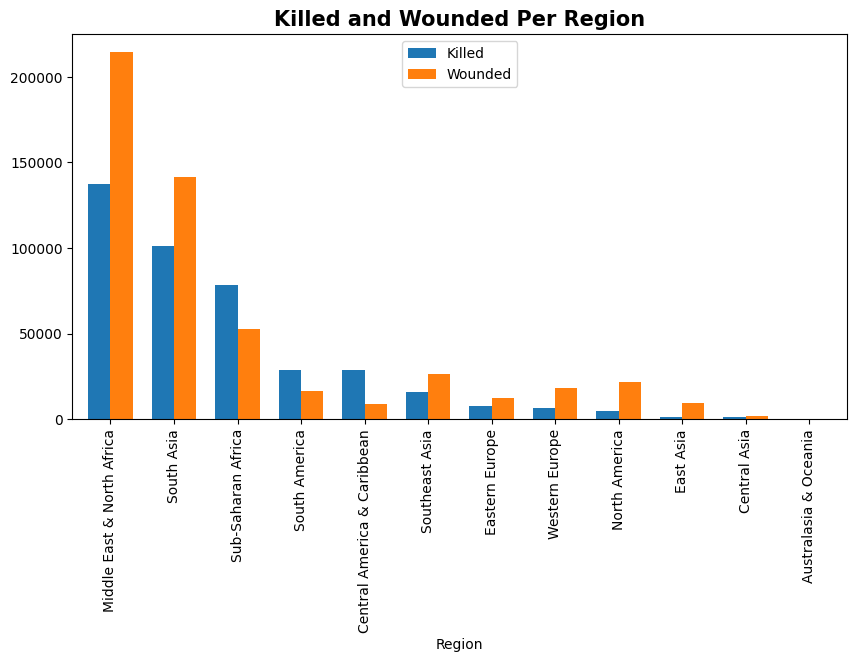

In [30]:
plt.figure(figsize = (20,8))
new_frame=df.groupby('Region')[['Killed','Wounded']].sum().sort_values(['Killed','Wounded'],ascending=False).reset_index()
new_frame.plot(x="Region", y=["Killed", "Wounded"], kind="bar", width=0.7)
plt.xlabel('Region')
plt.xticks(rotation = 90)
plt.title('Killed and Wounded Per Region', fontsize = 15, fontweight="bold")
plt.legend(loc='upper center')
plt.show

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

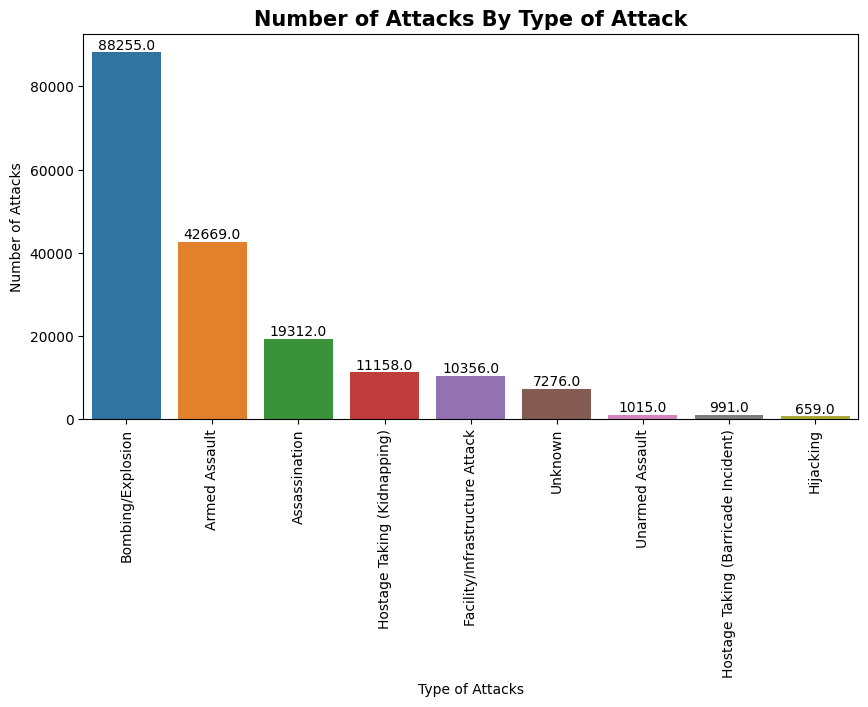

In [31]:
# Chart - 8 visualization code
#Attack Type
ax=sns.countplot(data=df,x='Attack_Type',order=df['Attack_Type'].value_counts()[:].index)
plt.title('Number of Attacks By Type of Attack', fontsize=15, fontweight='bold')
plt.ylabel('Number of Attacks')
plt.xlabel("Type of Attacks")
plt.xticks(rotation=90)

# Displaying count values on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 2000x800 with 0 Axes>

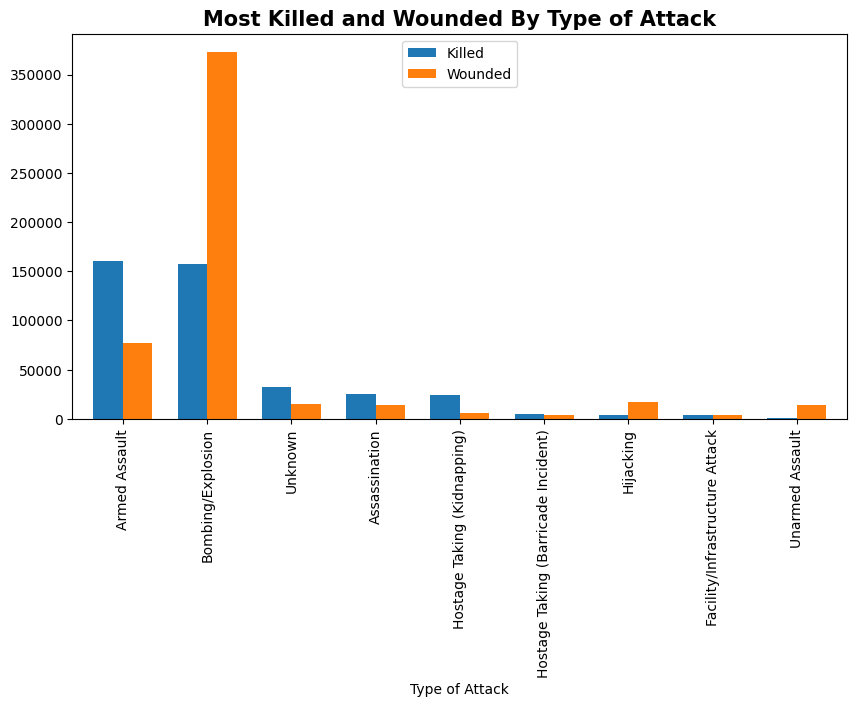

In [32]:
# Chart - 9 visualization code
plt.figure(figsize = (20,8))
new_frame=df.groupby('Attack_Type')[['Killed','Wounded']].sum().sort_values(['Killed','Wounded'],ascending=False).reset_index()
new_frame.plot(x="Attack_Type", y=["Killed", "Wounded"], kind="bar", width=0.7)
plt.xlabel('Type of Attack')
plt.xticks(rotation = 90)
plt.title('Most Killed and Wounded By Type of Attack', fontsize = 15, fontweight="bold")
plt.legend(loc='upper center')
plt.show


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

In [34]:
others=df.groupby('Weapon_Type')['eventid'].count().sort_values(ascending=False)[5:].sum()
s=df.groupby('Weapon_Type')['eventid'].count().sort_values(ascending=False)[0:5]
new_frame=pd.DataFrame({'Weapon': s.index, 'Attacks':s.values})
new_frame.loc[len(new_frame.index) ] = ['Other', others]
new_frame

,Weapon,Attacks
0,Explosives,92426
1,Firearms,58524
2,Unknown,15157
3,Incendiary,11135
4,Melee,3655
5,Other,794


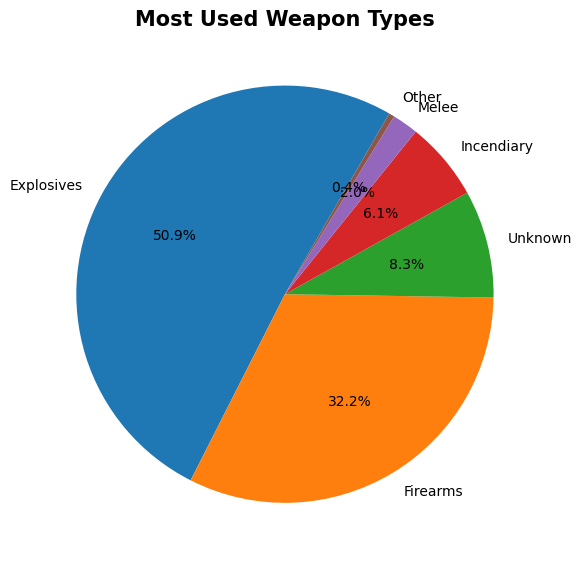

In [35]:
# Chart - 10 visualization code
#Weapon Type
labels = new_frame['Weapon']
values = new_frame['Attacks']

# Creating a pie chart
plt.figure(figsize=(6, 6))
plt.pie(values, labels=labels, autopct='%0.1f%%', startangle=60)

plt.title('Most Used Weapon Types', fontsize=15,fontweight='bold')
plt.tight_layout()
plt.show()


In [ ]:
#df.to_csv('new_df.csv', index=False)

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

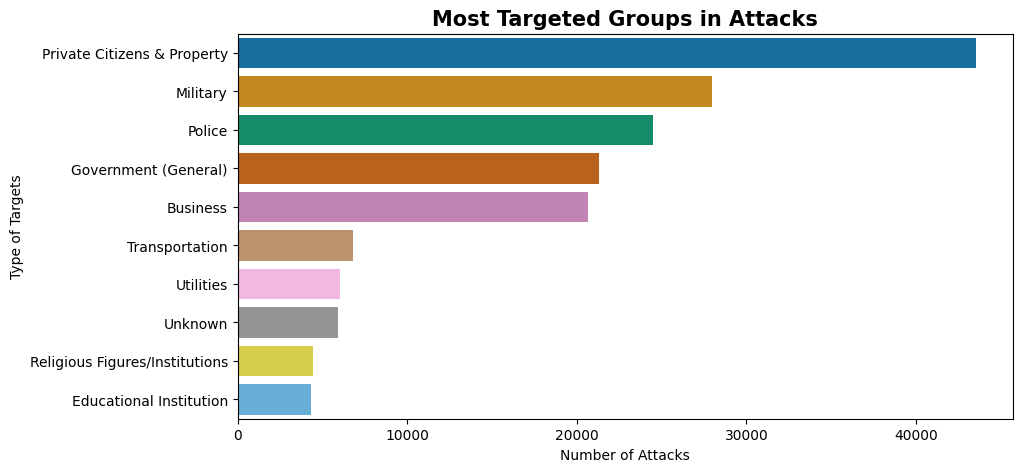

In [48]:
# Chart - 11 visualization code

x=df.groupby("Target_Type")['eventid'].count().sort_values(ascending=False)[0:10]
plt.figure(figsize = (10,5))
ax=sns.barplot(x = x.values,
           y = x.index,palette='colorblind', orient='h')
plt.ylabel('Type of Targets')
plt.xlabel('Number of Attacks')
plt.title('Most Targeted Groups in Attacks', fontsize=15, fontweight='bold')

plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

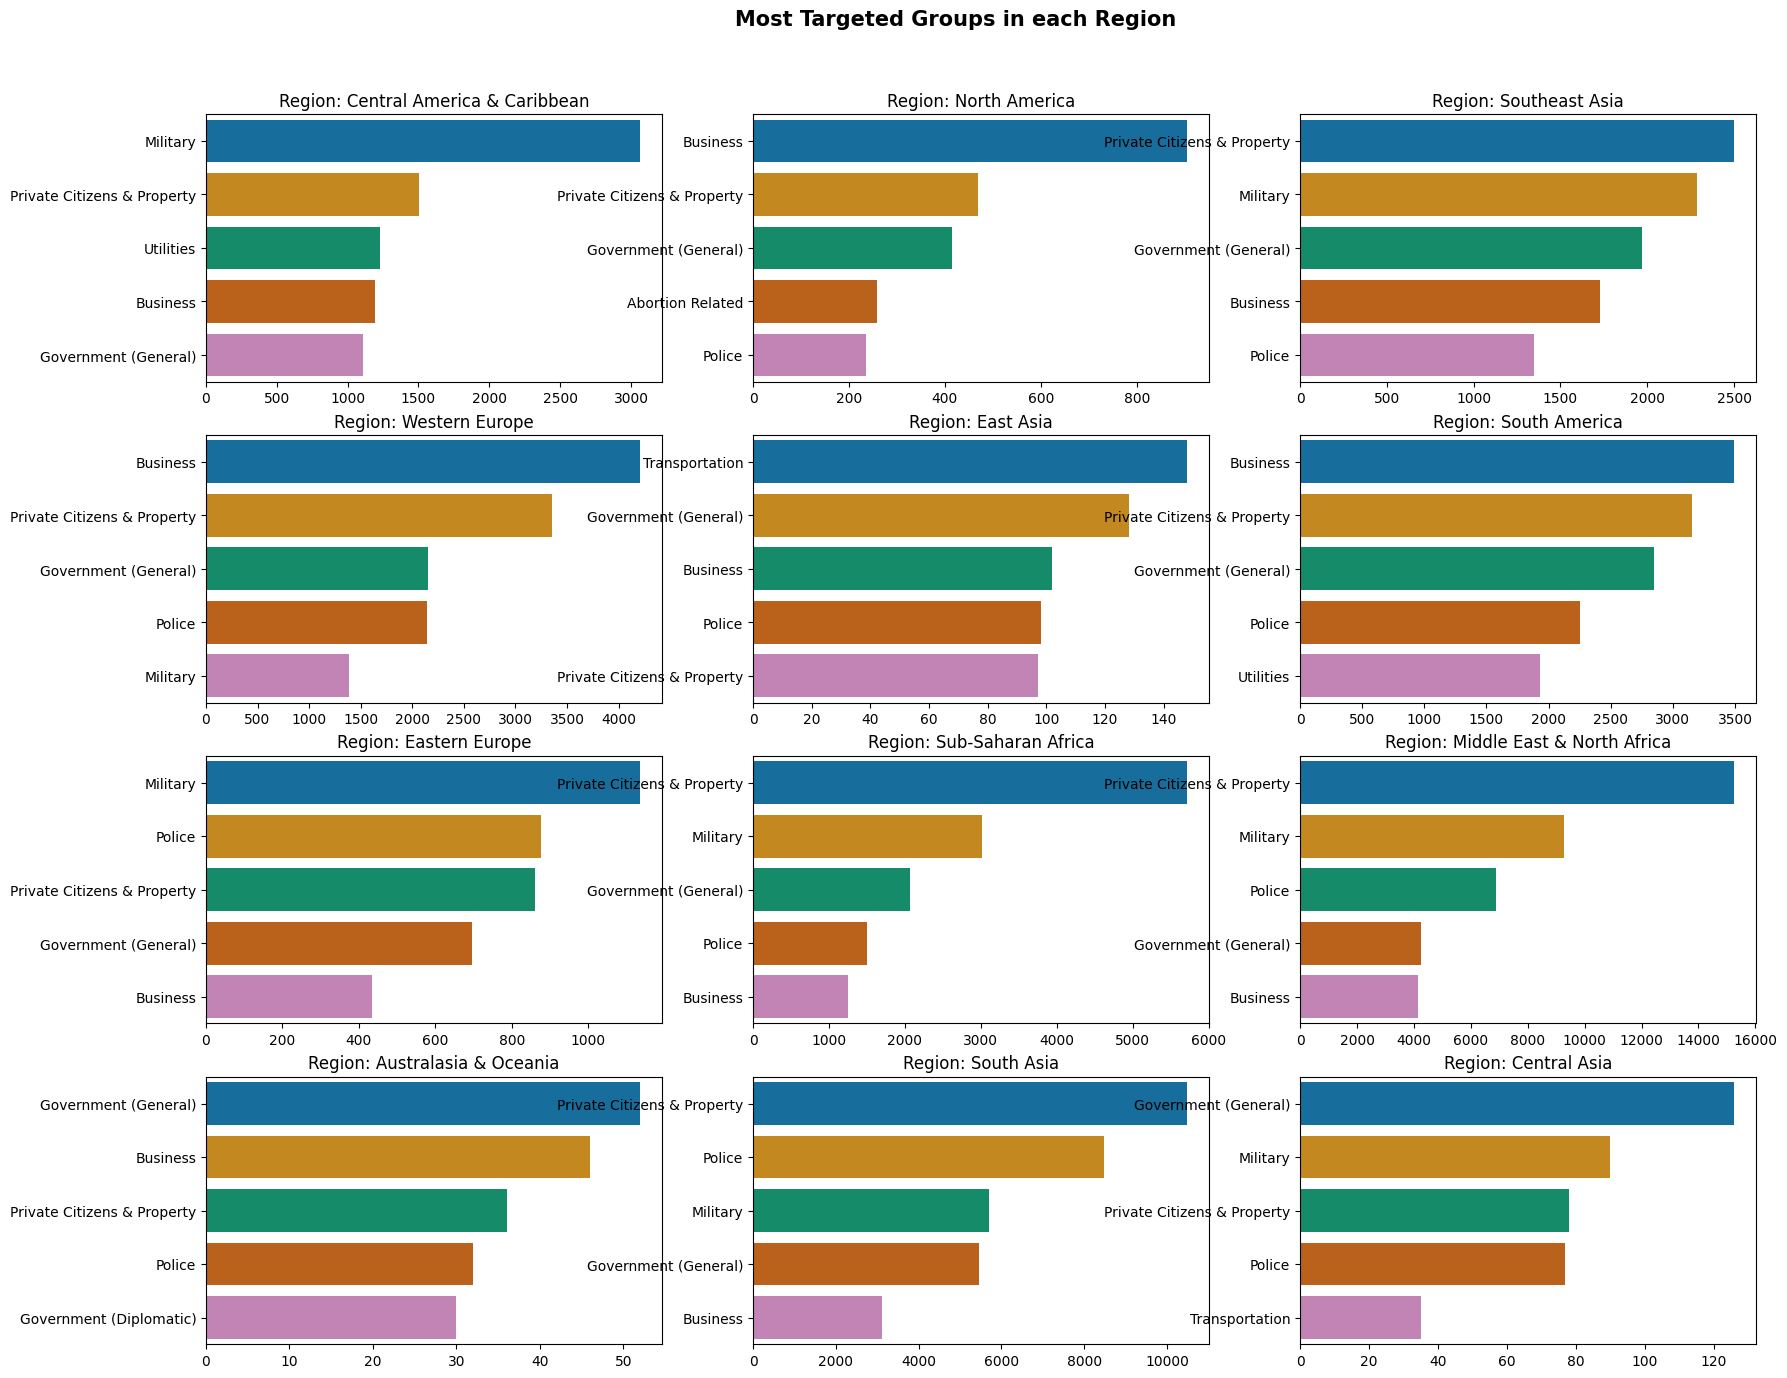

In [258]:
# Chart - 12 visualization code
fig, axes = plt.subplots(4, 3, figsize=(20,15))
fig.subplots_adjust(top=0.93)
plt.suptitle("Most Targeted Groups in each Region",  fontsize = 15, fontweight="bold",y=1)
i=0
j=0
flag=0
for value in df['Region'].unique():
  x=df[df['Region']==value].groupby('Target_Type')['eventid'].count().sort_values(ascending=False)[0:5]
  ax=sns.barplot(ax=axes[i,j],x = x.values, y = x.index,palette='colorblind', orient='h', ).set(title='Region: {}'.format(value),ylabel=None)
  j+=1
  flag+=1
  if j>2 and flag<12:
    i+=1
    j=0

plt.show()



##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

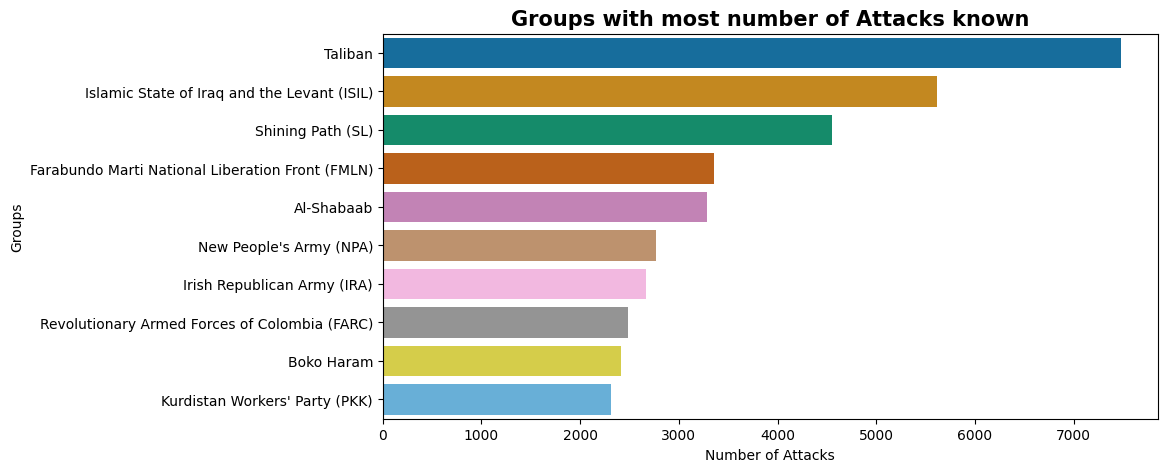

In [72]:
# Chart - 13 visualization code
#Groups
x=df.groupby("Group")['eventid'].count().sort_values(ascending=False)[1:11]
plt.figure(figsize = (10,5))
ax=sns.barplot(x = x.values,
           y = x.index,palette='colorblind', orient='h')
plt.ylabel('Groups')
plt.xlabel('Number of Attacks')
plt.title('Groups with most number of Attacks known', fontsize=15, fontweight='bold')

plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14

In [77]:
#Most targeted countries
most_targeted_countries=df.groupby('Country')['eventid'].count().sort_values(ascending=False)[0:10]
most_targeted_countries.index

Index(['Iraq', 'Pakistan', 'Afghanistan', 'India', 'Colombia', 'Philippines',
       'Peru', 'El Salvador', 'United Kingdom', 'Turkey'],
      dtype='object', name='Country')

In [103]:
#Finding top active groups in most targeted countries
df[(df['Country']=='Turkey') & (df['Group'] !='Unknown')].groupby('Group')['eventid'].count().sort_values(ascending=False)[0:6].values

array([2109,  236,   82,   69,   41,   36])

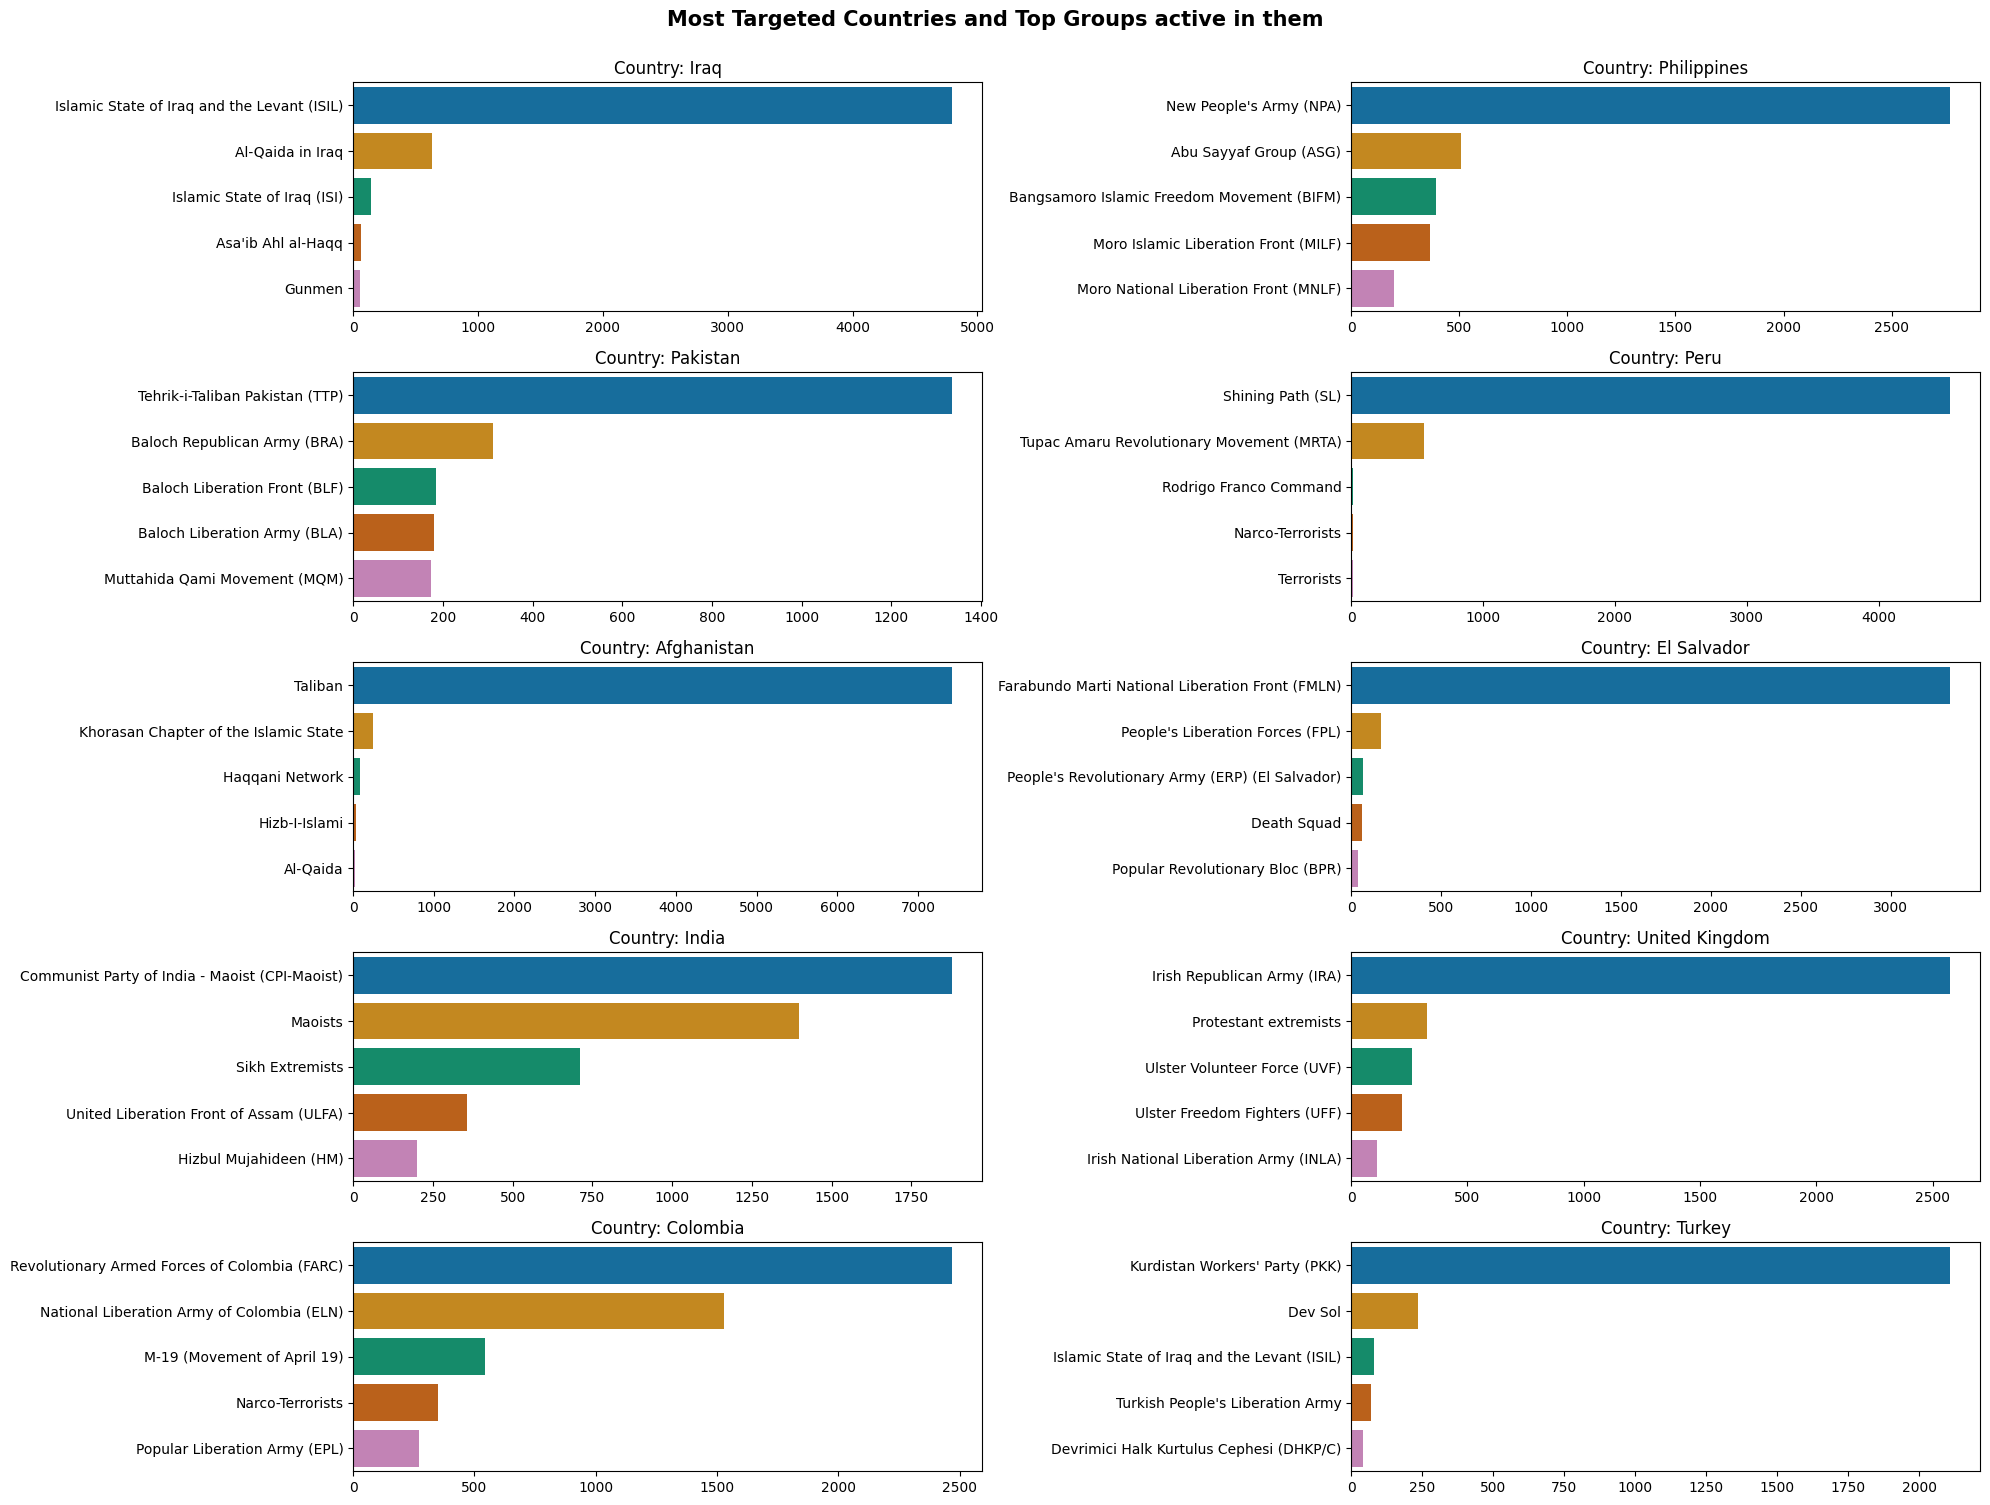

In [256]:
fig, axes = plt.subplots(5, 2, figsize=(20,15))
#fig.subplots_adjust(top=)

plt.suptitle("Most Targeted Countries and Top Groups active in them",  fontsize = 15, fontweight="bold", y=1)
i=0
j=0
flag=0
for value in most_targeted_countries.index:
  x=df[(df['Country']==value) & (df['Group'] !='Unknown')].groupby('Group')['eventid'].count().sort_values(ascending=False)[0:5]
  ax=sns.barplot(ax=axes[i,j],x = x.values, y = x.index,palette='colorblind', orient='h', ).set(title='Country: {}'.format(value),ylabel=None)
  i+=1
  flag+=1
  if i>4 and flag<10:
    i=0
    j=1
plt.tight_layout()
plt.show()

#### Chart - 15

<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 2000x800 with 0 Axes>

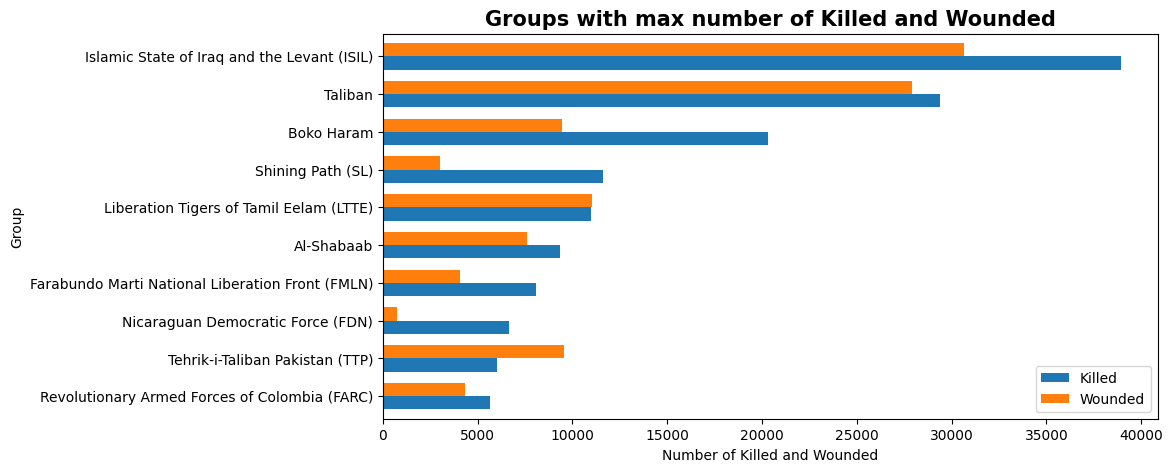

In [141]:
#Killed and Wounded by groups
plt.figure(figsize = (20,8))
new_frame=df[df['Group']!='Unknown'].groupby('Group')[['Killed', 'Wounded']].sum().sort_values(by='Killed', ascending=True)[-10:].reset_index()
new_frame.plot(x="Group", y=["Killed", "Wounded"], kind="barh", width=0.7,)
plt.xlabel('Number of Killed and Wounded')
plt.xticks(rotation =0)
plt.title('Groups that have caused max human damages', fontsize = 15, fontweight="bold")
plt.legend(loc='lower right')
plt.show

#### Chart - 16

In [205]:
#most targeted ountries
most_targeted_countries=df.groupby('Country')['eventid'].count().sort_values(ascending=False)[0:10]
most_targeted_countries.index

Index(['Iraq', 'Pakistan', 'Afghanistan', 'India', 'Colombia', 'Philippines',
       'Peru', 'El Salvador', 'United Kingdom', 'Turkey'],
      dtype='object', name='Country')

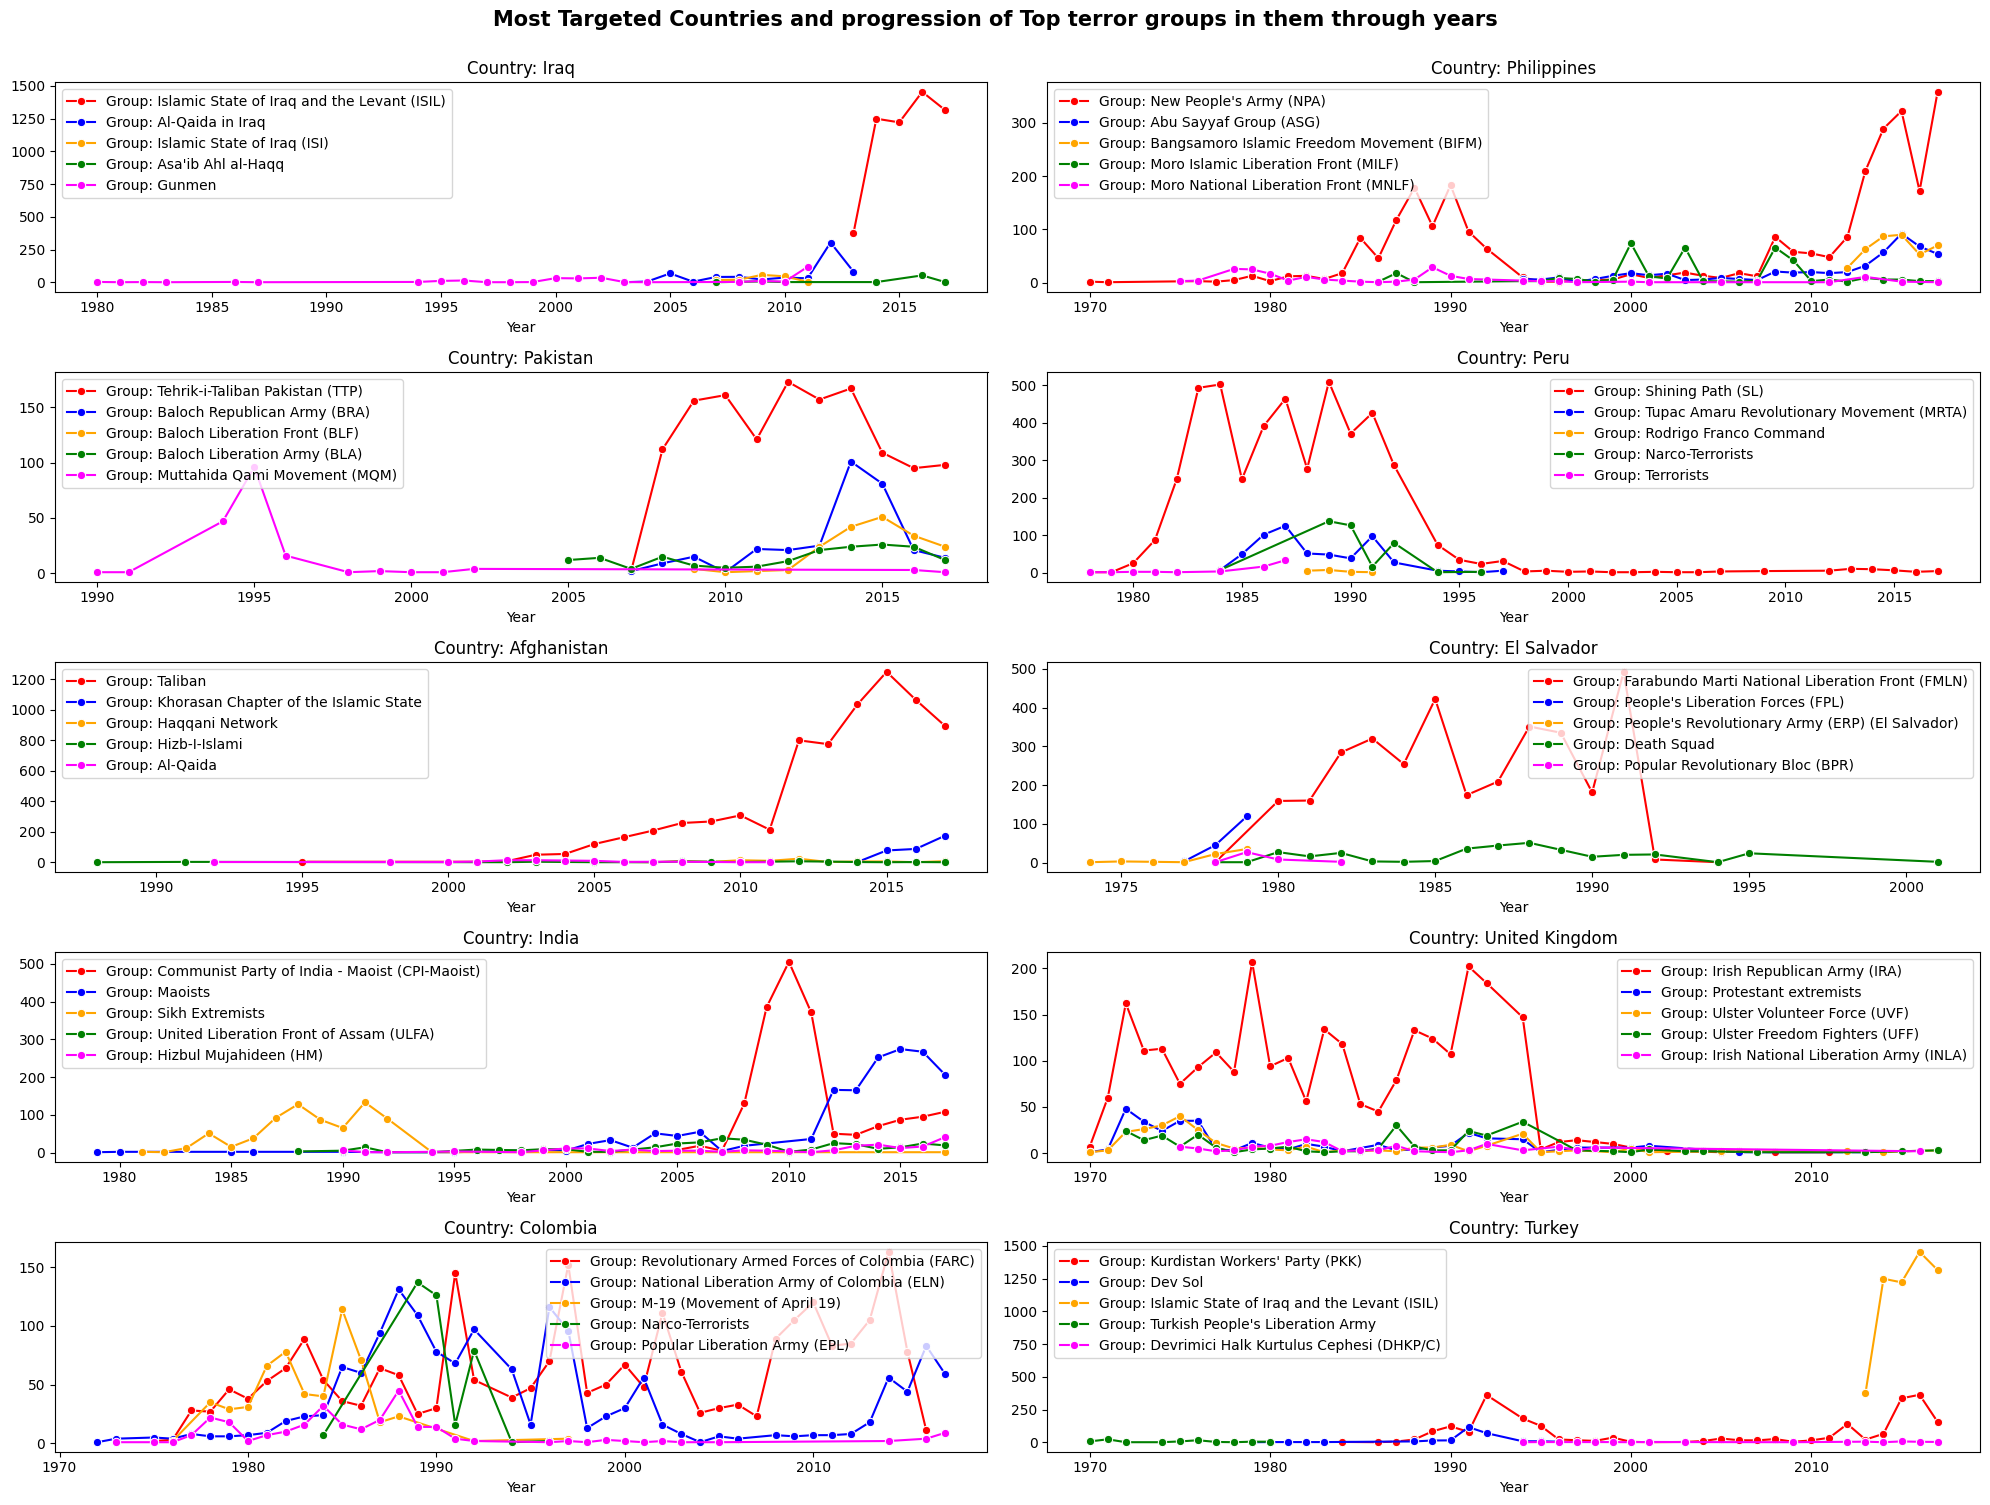

In [257]:
fig, axes = plt.subplots(5, 2, figsize=(20,15))
fig.subplots_adjust(top=0.85)

plt.suptitle("Most Targeted Countries and progression of Top terror groups in them through years",  fontsize = 15, fontweight="bold",y=1)
i=0
j=0
flag=0

for value in most_targeted_countries.index:
  groups=df[(df['Country']==value) & (df['Group'] !='Unknown')].groupby('Group')['eventid'].count().sort_values(ascending=False).index[0:5]

  for c,group in enumerate(groups):
    colors=['red','blue','orange','green','magenta']
    s=df[df['Group']==group].groupby('Year')['eventid'].count()
    new_frame=pd.DataFrame({'Year':s.index,'Attacks':s.values})
    ax=sns.lineplot(data=new_frame,x='Year', y='Attacks', marker='o', linestyle='-', color=colors[c], label='Group: {}'.format(group),ax=axes[i,j]).set(title='Country: {}'.format(value),ylabel=None)
  i+=1
  flag+=1
  if i>4 and flag<10:
    i=0
    j=1
plt.tight_layout()
plt.show()

#### Chart - 14 - Correlation Heatmap

In [ ]:
# Correlation Heatmap visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot

In [ ]:
# Pair Plot visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?
Explain Briefly.

Answer Here.

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***